#**Disease Prediction**

----
----

##Import Libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import math

from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt


##Import Datasets

In [4]:
train = pd.read_csv('/content/Training.csv')
test = pd.read_csv('/content/Testing.csv')


In [5]:
train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


## Pre - Processing Data

In [6]:
train.isnull().sum() #checking for null data

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [7]:
print(train.duplicated().sum())
train.drop_duplicates(inplace=True) #Droping the dupliments

4616


In [19]:
train=train.fillna(0)

In [20]:
train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,0.0
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,0.0
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,Impetigo,0.0
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,Impetigo,0.0


In [41]:
train.drop('Unnamed: 133',axis=1,inplace=True)

In [42]:
x = train.drop('prognosis', axis = 1)
y = train['prognosis']

In [43]:
x


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Split the data into features and labels

In [44]:
#slipting into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(228, 132)
(228,)
(76, 132)
(76,)


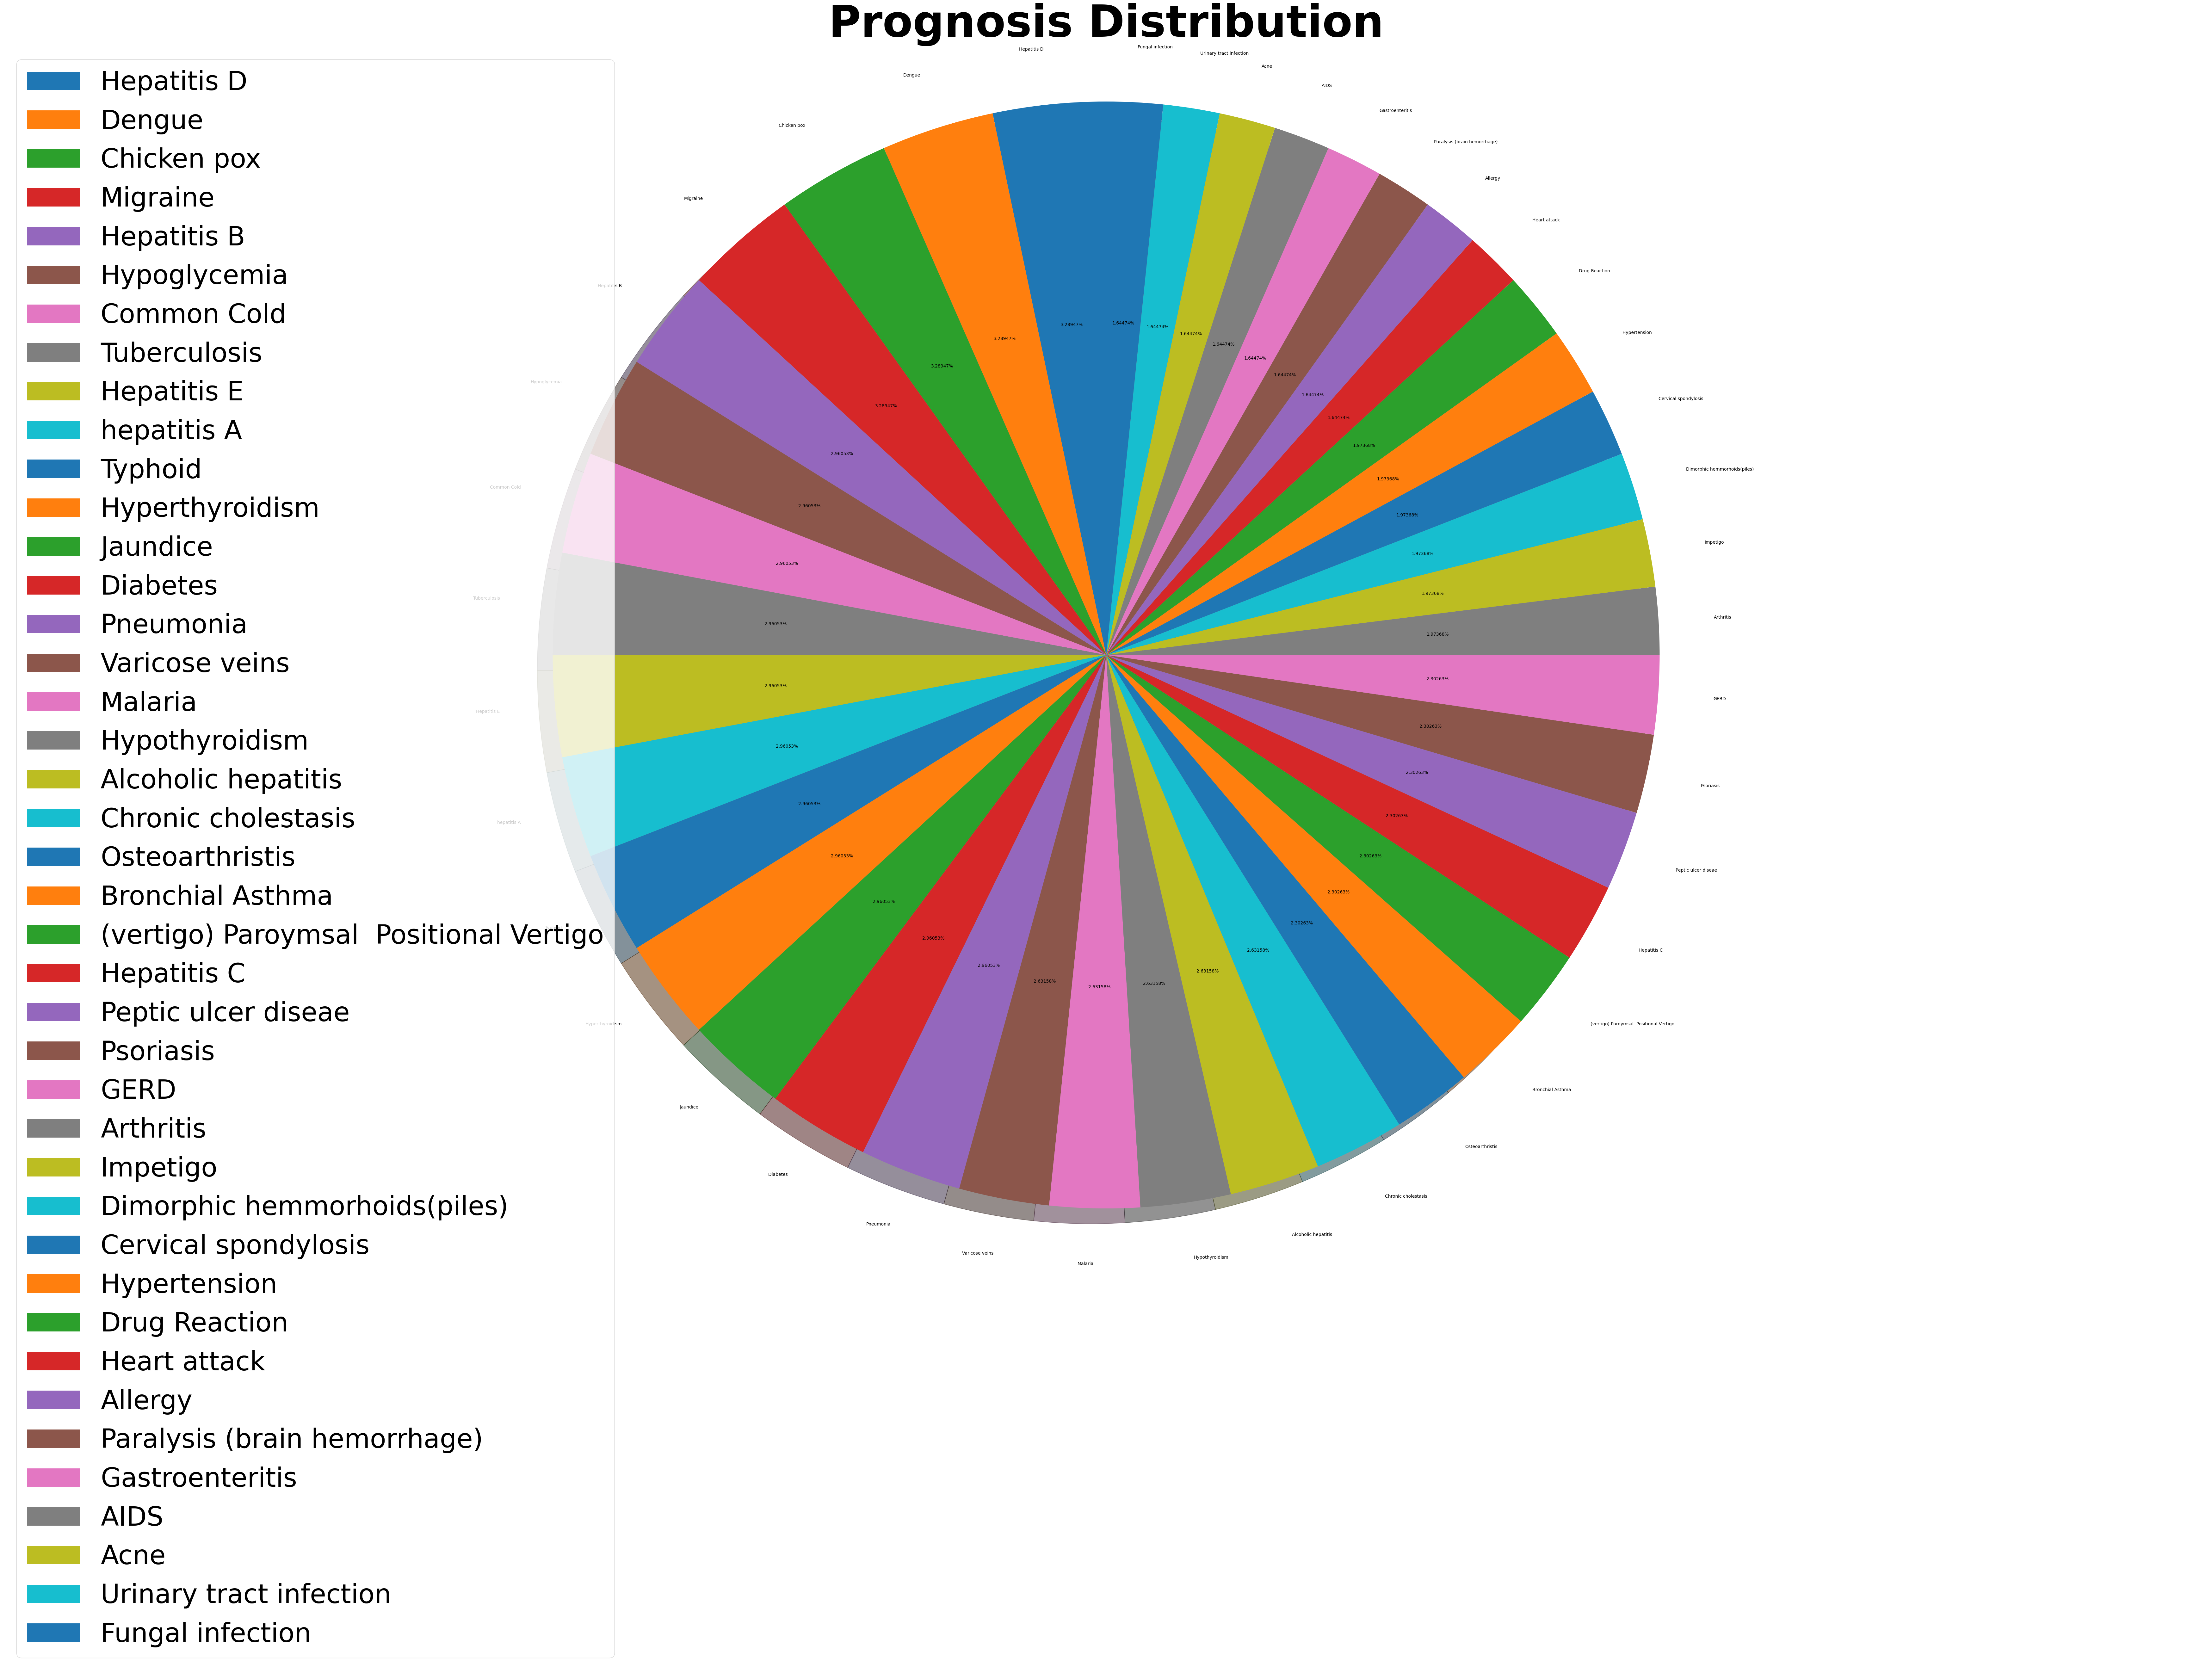

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(90, 50))

category_counts = train['prognosis'].value_counts()


plt.pie(category_counts, labels=category_counts.index,  autopct='%1.5f%%', shadow=True, startangle=90)

plt.title('Prognosis Distribution', fontsize=100, fontweight='bold')
plt.legend(category_counts.index, loc='best', fontsize=60)
plt.axis('equal')

plt.show()

## Logistic Regression


In [45]:
#Applying logistic Regression
model=LogisticRegression()
model.fit(x_train,y_train)

#predicting the Results
y_pred = model.predict(x_test)

#Confusion matrix
confusion_matrix(y_test,y_pred)

accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 100.00


#### Text Dataset

In [46]:
test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [47]:
test.describe

<bound method NDFrame.describe of     itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          0                     0                    1          1   
2         0          0                     0                    0          0   
3         1          0                     0                    0          0   
4         1          1                     0                    0          0   
5         0          0                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11    

In [48]:
train.isnull().sum() #checking for null data

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [49]:
test=test.fillna(0)

In [50]:
x2_test = test.drop('prognosis', axis = 1)
y2_test = test['prognosis']

In [52]:
y_pred2 = model.predict(x2_test)
#Confusion matrix
confusion_matrix(y2_test,y_pred2)

accuracy=accuracy_score(y2_test,y_pred2)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 100.00


##Support Vector Machine

In [63]:
# Support Vector Machine classification
svm_model = SVC()

svm_model.fit(x_train,y_train)

svm_y_pred = svm_model.predict(x_test)

svm_cm = confusion_matrix(y_test, svm_y_pred)

accuracy=accuracy_score(y_test, svm_y_pred)*100
print("Accuracy of the model is {:.2f} %".format(accuracy))


Accuracy of the model is 100.00 %


###Test Data

In [64]:
y_pred2 = svm_model.predict(x2_test)
#Confusion matrix
confusion_matrix(y2_test,y_pred2)

accuracy=accuracy_score(y2_test,y_pred2)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 100.00


## Random Forest

In [65]:
# Random Forest classification
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

rf_y_pred = rf_model.predict(x_test)

# Compute the confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)

accuracy=accuracy_score(y_test, rf_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 100.00


### Test Data

In [67]:
y_pred2 = rf_modelgoo.predict(x2_test)
#Confusion matrix
confusion_matrix(y2_test,y_pred2)

accuracy=accuracy_score(y2_test,y_pred2)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.62
